# Exploratory Data Analysis: News Titles & Headlines

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

# Goals

* Exploration of sentiment
* Exploration of popularity
* Exploration of topics favored by sources

In [203]:
main_data = pd.read_csv('News_Final.csv', encoding='utf8')

In [204]:
main_data.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


In [205]:
main_data.columns

Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus',
       'LinkedIn'],
      dtype='object')

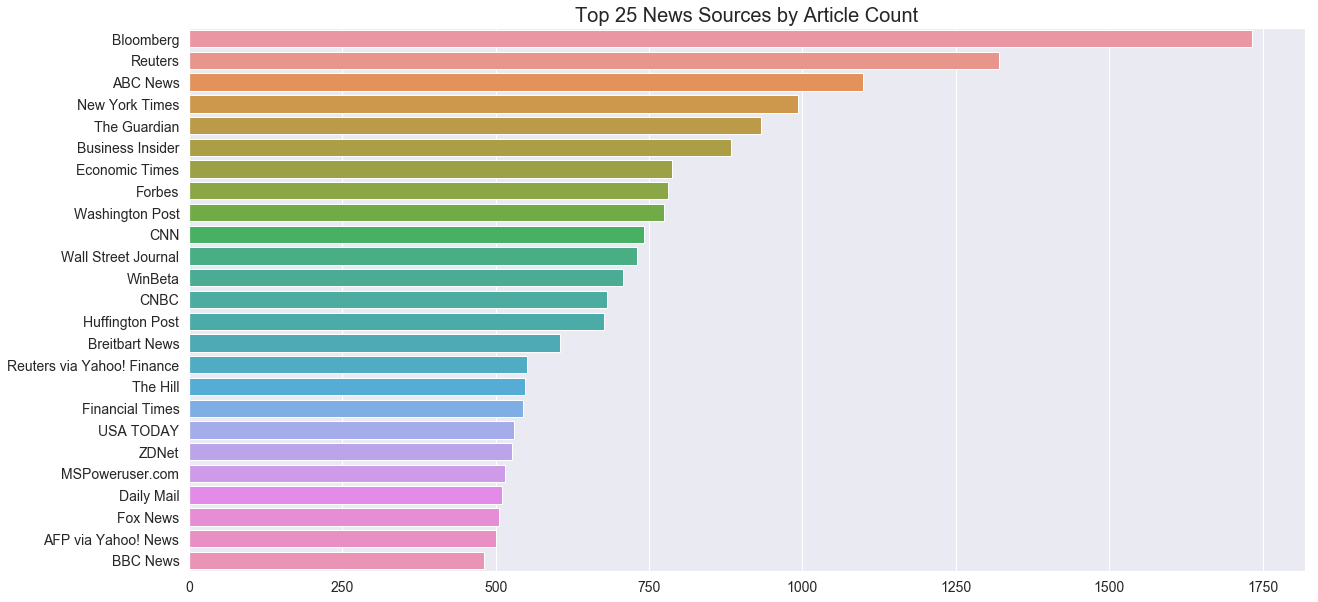

In [206]:
# Grab the top 25 news sources
freq_sources = main_data.Source.value_counts()[0:25]

plt.figure(figsize=(20,10))

# Source names go on the y-axis, so that the plot is created horizontally
sns.barplot(x = freq_sources.values, y = freq_sources.index)

# Titles and labels
plt.title('Top 25 News Sources by Article Count', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [207]:
# Separate the data into their respective categories
obama_data = main_data[main_data['Topic'] == 'obama']
economy_data = main_data[main_data['Topic'] == 'economy']
palestine_data = main_data[main_data['Topic'] == 'palestine']
microsoft_data = main_data[main_data['Topic'] == 'microsoft']

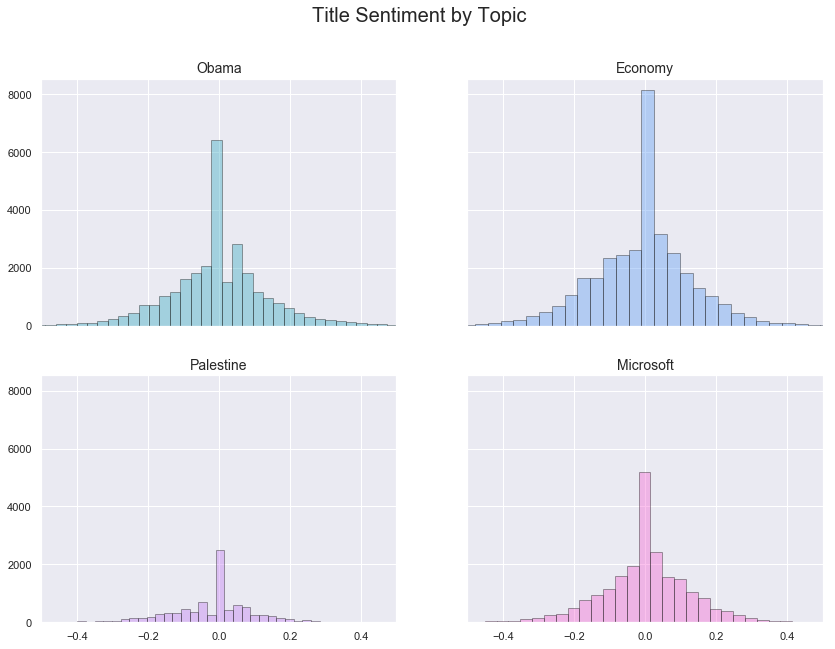

In [223]:
# Initialize a large 2x2 grid of subplots, share x and y axes between plots
fig, ax = plt.subplots(2, 2, figsize = (14, 10), sharex = True, sharey = True)

# Collect data, subplots, desired colors, and titles into lists for easy plotting
list_all = [obama_data, economy_data, palestine_data, microsoft_data]
subplots = [ax[0][0], ax[0][1], ax[1][0], ax[1][1]]
colors = list(sns.husl_palette(10, h=.5)[1:5]) 
titles = ['Obama', 'Economy', 'Palestine', 'Microsoft']

# Create all 4 subplots with one for loop using zip
for data, subplot, color, title in zip(list_all, subplots, colors, titles):
    sns.distplot(data['SentimentTitle'], kde=False, ax=subplot, color=color, 
                 hist_kws = dict(edgecolor='k', linewidth=1))
    subplot.set_title(title, fontsize=14)
    subplot.set_xlabel('')    

# Add final tweaks: overall title, limits on x-axis, reduce number of y ticks
fig.suptitle('Title Sentiment by Topic', fontsize=20)
plt.xlim(-0.5, 0.5)
plt.yticks(np.arange(0, 8001, 2000))

plt.show()

This plot gives us a lot of valuable information about title sentiment in our data.

1. We can see at a glance that **Obama** and **Economy** are the most prevalent topics in this dataset. 
2. We can see that the title sentiments for all four topics vaguely resemble **normal distributions**, although they are much flatter than is typical. It's unclear if this emerged naturally, or if the researchers purposefully shaped the data such that this would be the case.
3. We can also see that all four topic sentiments are highly **unimodal**, centered around 0. A large proportion of the headlines in our dataset are thus considered "neutral" in terms of their sentiment.

Let's create the same plot for headlines, to see whether the trends will differ.

Automatic pdb calling has been turned OFF


/Users/charlenechambliss/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


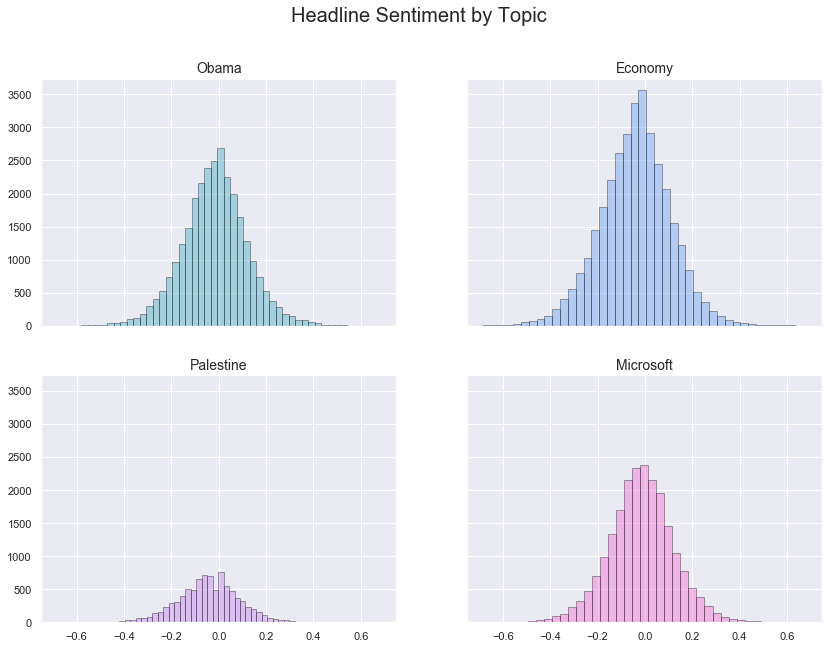

In [229]:
# Initialize a large 2x2 grid of subplots, share x and y axes between plots
fig, ax1 = plt.subplots(2, 2, figsize = (14, 10), sharex = True, sharey = True)

# Define the new subplot list to avoid conflicts
subplots = [ax1[0][0], ax1[0][1], ax1[1][0], ax1[1][1]]

# The other lists already exist, so we can call them again and just change SentimentTitle to SentimentHeadline
for data, subplot, color, title in zip(list_all, subplots, colors, titles):
    sns.distplot(data['SentimentHeadline'], kde=False, ax=subplot, color=color, 
                 hist_kws = dict(edgecolor='k', linewidth=1))
    subplot.set_title(title, fontsize=14)
    subplot.set_xlabel('')    

# Add final tweaks: overall title, limits on x-axis, reduce number of y ticks
fig.suptitle('Headline Sentiment by Topic', fontsize=20)
plt.xlim(-0.75, 0.75)
#plt.yticks(np.arange(0, 4000, 1000))

plt.show()

Very interesting! Compared to title sentiment, headlines are even more normally distributed. Instead of a median and mode at 0 with a flattened distribution, we see that most values tend to fall near 0 but not at precisely 0. I'd be interested to know if this might be a measurement artifact, or if it was a direct result of the data (the words used in titles vs. headlines). 

Let's take a look at some titles and headlines that are considered "outliers" for these distributions.

In [210]:
def get_most_positive(data, column_name, most_negative=False): 
    '''
    Returns the most positive title or headline by sentiment rating. Can be used to 
    get the most negative title/headline by specifying most_negative=True.
    '''
    # most_positive is False (an empty string) by default, in case an incorrect column is passed
    most_positive = ''
    
    # Check for correct column, then locate the most positive title/headline
    if column_name in ('SentimentTitle', 'SentimentHeadline'):
    
        # Default: most_negative is False, so find the most positive value with np.max
        if most_negative == False:
            data_most_positive = data[data[column_name] == np.max(data[column_name])]
        else:
            data_most_positive = data[data[column_name] == np.min(data[column_name])]

        # Check whether we should return the title or the headline
        if column_name == 'SentimentTitle':
            most_positive = data_most_positive[:1]['Title'].values
        else:
            most_positive = data_most_positive[:1]['Headline'].values
    
    # Skip down to here if the column name is incorrect
    else: 
        print('This function wasn\'t written for that. Try passing \'SentimentTitle\' or \'SentimentHeadline\'.')
    
    # If most_positive is defined, return it
    if most_positive:    
        return most_positive[0]
    else:
        return ''

I will freely admit that the above function has some wonky variable naming - I'll likely come back and rework this (and possibly refactor, if there is a more robust and efficient way of tackling the problem). The extra bit about returning an empty string at the end is to prevent the function from returning None by default.

Let's test the function out a bit to make sure it works:

In [211]:
print(get_most_positive(microsoft_data, 'SentimentTitle'))

print(get_most_positive(palestine_data, 'SentimentHeadline', most_negative=True))

print(get_most_positive(economy_data, 'Source'))

Microsoft Band 2: The Best Fitness Watch for People Who Really Like to Sweat
The bicyclist, a 54-year-old Palestine resident, appeared to have head injury and was transported for treatment. 
This function wasn't written for that. Try passing 'SentimentTitle' or 'SentimentHeadline'.



In [212]:
# Recall that `titles` contains the four topics, `list_all` contains the four topic datasets

# Print pairs of most positive and negative titles by sentiment
for topic, data in zip(titles, list_all):
    print('Most positive {} title: {}'.format(topic, get_most_positive(data, 'SentimentTitle')))
    print('Most negative {} title: {}'.format(topic, get_most_positive(data, 'SentimentTitle', most_negative=True)))
    print()

Most positive Obama title: Obama administration upbeat about health law sign-ups
Most negative Obama title: Obama's stubborn, willful complacency on terror

Most positive Economy title: We just got some really great news about the economy
Most negative Economy title: Improving economy not helping all

Most positive Palestine title: EP mural taking shape
Most negative Palestine title: The Unbearable Lightness of Murder: The Tragedy of Palestine's ...

Most positive Microsoft title: Microsoft Band 2: The Best Fitness Watch for People Who Really Like to Sweat
Most negative Microsoft title: Satya Nadella just fixed a massive problem at Microsoft



In [213]:
# Do the same for headlines
for topic, data in zip(titles, list_all):
    print('Most positive {} headline: {}'.format(topic, get_most_positive(data, 'SentimentHeadline')))
    print('Most negative {} headline: {}'.format(topic, get_most_positive(data, 'SentimentHeadline', most_negative=True)))
    print()

Most positive Obama headline:  seems to be quite unconcerned about how the Secret Service wanted a word with him about what he has suggested about President Obama.
Most negative Obama headline: &quot;Climate change is a massive problem,&quot; Obama said. &quot;It is a generational problem. It's a problem that by definition is just about the hardest thing

Most positive Economy headline: It all depends on what the Fed thinks about the real economy, and whether to normal sooner means getting the real economy back to healthy,
Most negative Economy headline: There's a sense this economy is just not coming back, at least not like it was before. Who knows whether that pessimism is correct, but in the

Most positive Palestine headline: The Latest on Texas flooding (all times local): 
Most negative Palestine headline: The bicyclist, a 54-year-old Palestine resident, appeared to have head injury and was transported for treatment. 

Most positive Microsoft headline: Gregory &quot;Trey&quot; Thom

In [214]:
# To be continued!

# Next: popularity analysis